<a href="https://colab.research.google.com/github/guicttram/wine-quality-prediction/blob/main/TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Investigação de Métodos de Aprendizado de Máquina para Predição de Qualidade de Vinhos

## 0. Load data

In [1]:
import pandas as pd

In [2]:
df_red = pd.read_csv('/content/drive/MyDrive/TCC/winequality-red.csv', sep=";")
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df_white = pd.read_csv('/content/drive/MyDrive/TCC/winequality-white.csv', sep=";")
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## Exploratory Data Analysis - EDA

Let's perform the EDA using the white wine dataframe, since it contains more records. We will start with a describe method to have an overview of the data, then moving to more specific analyses.

In [4]:
df_white.columns = df_white.columns.str.replace(' ', '_')

In [5]:
df_white.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


There are two things to note here at first glance:

*   All of the columns are numeric. That means we won't need to encode it, only normalize the values for model calculations.
*   The columns *free_sulfur_dioxide*, *total_sulfur_dioxide* and *residual_sugar* have high standard deviation values. We should investigate that.

Before jumping into the column analysis, let's just search for null values and work with them first.



In [6]:
# Null values
df_white.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

We didn't find any null values, which indicates the data has a good consistency. Now let's look into those columns with high standard deviations.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

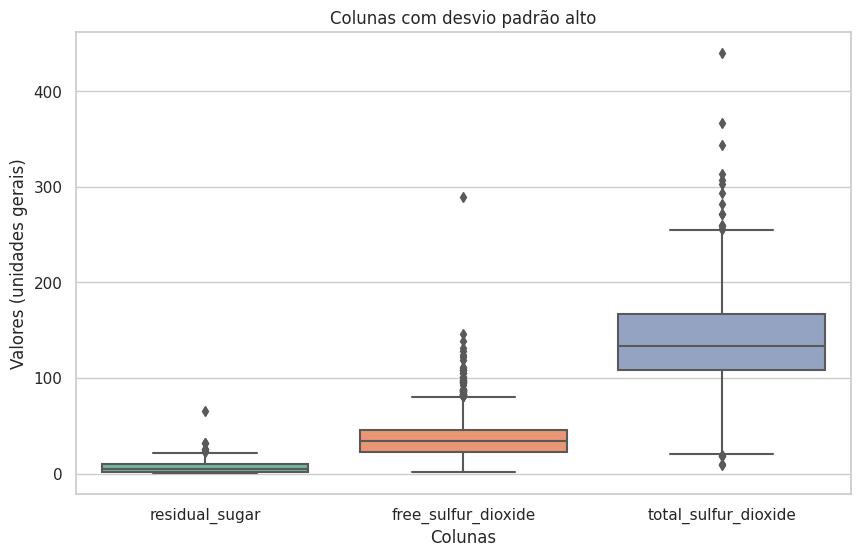

In [8]:
plt.figure(figsize=(10, 6))  # Fig size
sns.set(style="whitegrid")  # Plot style

sns.boxplot(data=df_white[['residual_sugar', 'free_sulfur_dioxide', 'total_sulfur_dioxide']], palette="Set2")

plt.title("Colunas com desvio padrão alto")
plt.xlabel("Colunas")
plt.ylabel("Valores (unidades gerais)")

plt.show()


As we can see, these columns have some outliers. There are several strategies for dealing with outliers. Let's see how many rows contain outlier values for these columns. If the total number isn't high to the point of damaging our volume of data, we will remove the rows. Otherwise, we might fill those values with other values, such as mean or median.

In [9]:
# Select the columns of interest
columns_of_interest = ['residual_sugar', 'free_sulfur_dioxide', 'total_sulfur_dioxide']

# Function to count outliers
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    return ((column < (Q1 - 1.5 * IQR)) | (column > (Q3 + 1.5 * IQR))).sum()

# Create a dictionary to store the number of outliers per column
outliers_per_column = {}

# Iterate over the columns of interest
for column in columns_of_interest:
    outliers_per_column[column] = count_outliers(df_white[column])

print(outliers_per_column)

{'residual_sugar': 7, 'free_sulfur_dioxide': 50, 'total_sulfur_dioxide': 19}


Ok, these are low numbers. We will remove these rows entirely from the dataframe in order to avoid noise in the data.

In [10]:
def remove_outliers(df, column_name, threshold=3):
    """
    Removes outliers from a column in a DataFrame using the Z-score method.

    Args:
        df (pd.DataFrame): The DataFrame containing the column with outliers.
        column_name (str): The name of the column with outliers.
        threshold (int, optional): The threshold for identifying outliers in terms of standard deviations. Default is 3.

    Returns:
        pd.DataFrame: A DataFrame with outliers removed.
    """
    z_scores = np.abs((df[column_name] - df[column_name].mean()) / df[column_name].std())
    filtered_df = df[z_scores < threshold].copy()
    return filtered_df

In [11]:
cleaned_df = remove_outliers(df_white, [column for column in columns_of_interest])

In [12]:
# Create a dictionary to store the number of outliers per column
outliers_per_column = {}

# Iterate over the columns of interest
for column in columns_of_interest:
    outliers_per_column[column] = count_outliers(cleaned_df[column])

print(outliers_per_column)
print('DataFrame size: ', len(cleaned_df))

{'residual_sugar': 0, 'free_sulfur_dioxide': 25, 'total_sulfur_dioxide': 7}
DataFrame size:  4898


Great. We removed rows containing outliers values for every column and didn't lost a significative data volume. Of course some outliers will still exist, since we modified the original values, but we won't go that far as to stress over them. Let's visualize how closer the current outlier values are:

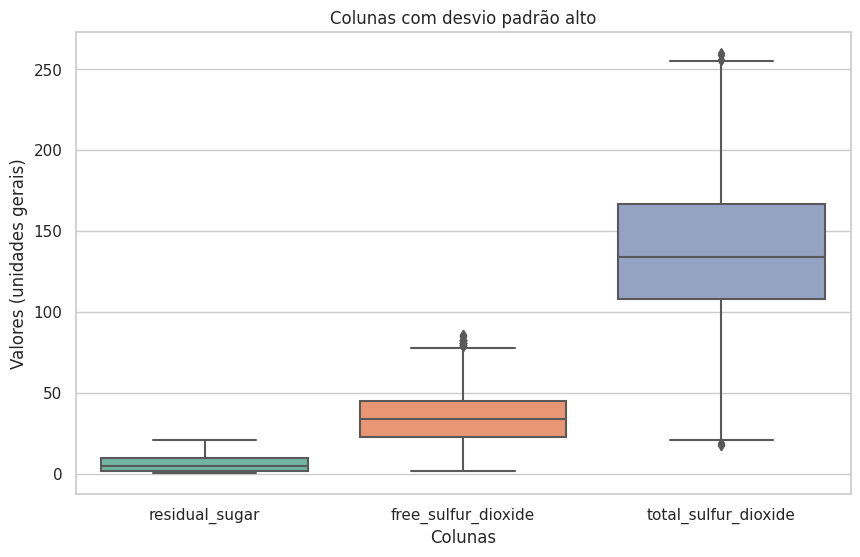

In [13]:
plt.figure(figsize=(10, 6))  # Fig size
sns.set(style="whitegrid")  # Plot style

sns.boxplot(data=cleaned_df[['residual_sugar', 'free_sulfur_dioxide', 'total_sulfur_dioxide']], palette="Set2")

plt.title("Colunas com desvio padrão alto")
plt.xlabel("Colunas")
plt.ylabel("Valores (unidades gerais)")

plt.show()